In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import glob

from keras.models import load_model
model = load_model('./training_models/NN_digit.h5')

Using TensorFlow backend.


In [3]:
cell00 = np.load('./SudokuCells/cell_np0 0.npy')
cell04 = np.load('./SudokuCells/cell_np0 4.npy')
cell08 = np.load('./SudokuCells/cell_np0 8.npy')
cell26 = np.load('./SudokuCells/cell_np2 6.npy')
cell43 = np.load('./SudokuCells/cell_np4 3.npy')
cell41 = np.load('./SudokuCells/cell_np4 1.npy')
cell62 = np.load('./SudokuCells/cell_np6 2.npy')
cell78 = np.load('./SudokuCells/cell_np8 8.npy')
cell47 = np.load('./SudokuCells/cell_np4 7.npy')
cell70 = np.load('./SudokuCells/cell_np7 0.npy')

model.predict_classes(cell70.reshape((, 784)))

SyntaxError: invalid syntax (<ipython-input-3-4851bc000386>, line 12)

In [12]:
def show_mask(mask):
    plt.figure(figsize=(5, 5))
    plt.imshow(mask, cmap='gray')

def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print len(contours)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

In [13]:
cell01 = np.load('./SudokuCells/cell_np0 0.npy')
big_contour01, red_mask01 = find_biggest_contour(cell01.reshape((28, 28)))
# big_contour00, red_mask00 = find_biggest_contour(cell00.reshape((28, 28)))
# big_contour04, red_mask04 = find_biggest_contour(cell04.reshape((28, 28)))
big_contour08, red_mask08 = find_biggest_contour(cell08.reshape((28, 28)))
# big_contour26, red_mask26 = find_biggest_contour(cell26.reshape((28, 28)))
# big_contour41, red_mask41 = find_biggest_contour(cell41.reshape((28, 28)))
# big_contour43, red_mask43 = find_biggest_contour(cell43.reshape((28, 28)))
# big_contour47, red_mask47 = find_biggest_contour(cell47.reshape((28, 28)))
# big_contour62, red_mask62 = find_biggest_contour(cell62.reshape((28, 28)))
# big_contour78, red_mask78 = find_biggest_contour(cell78.reshape((28, 28)))

# area = [cv2.contourArea(big_contour00), cv2.contourArea(big_contour04), cv2.contourArea(big_contour08),
#        cv2.contourArea(big_contour26), cv2.contourArea(big_contour41), cv2.contourArea(big_contour43),
#        cv2.contourArea(big_contour47), cv2.contourArea(big_contour62), cv2.contourArea(big_contour78)]

print "-"*80

2
4
--------------------------------------------------------------------------------


In [17]:
big_contour70, red_mask70 = find_biggest_contour(cell70.reshape((28, 28)))
model.predict_classes(cell70)

1


ValueError: Error when checking : expected dense_7_input to have shape (None, 784) but got array with shape (28, 28)

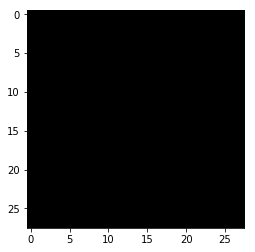

In [5]:
img = cell08.reshape((28, 28))
if(cv2.contourArea(big_contour08) < 5.0):
    img[:, :] = 0
else:
    pass


plt.imshow(img, 'gray')

In [6]:
M = cv2.moments(big_contour)
print( M )

NameError: name 'big_contour' is not defined

In [7]:
# Centroid of the biggest blob
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

NameError: name 'M' is not defined

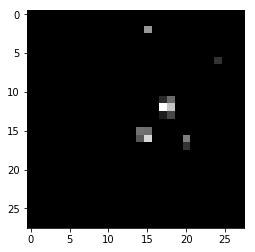

In [8]:
img = cell78.reshape((28, 28))
plt.imshow(img, 'gray')

In [9]:
cell00 = np.load('./SudokuCells/cell_np0 0.npy')
image = cell00.reshape((28, 28))

contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print len(contours)

# Isolate largest contour
try:
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
except:
    biggest_contour = 0
print biggest_contour 


2
[[[19 10]]

 [[18 11]]

 [[18 12]]

 [[19 12]]

 [[20 11]]

 [[20 10]]]
